In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

import statsmodels.api as sm
import statsmodels.formula.api as smf 

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df=pd.read_csv("final-data.csv")

In [4]:
df.head()

,the_index,Title,DomesticTotalGross,RunTime,ReleaseDate,Director,ProductionBudget,InRelease,MpaaRating,Distributor,Genre,Nominations,Wins,IntDayOfTheYear,IntMonthOfTheYear,DayOfTheYear^2,OpeningGross,OpeningRank,OpeningRatio,GenreMap_Comedy
0,http://www.boxofficemojo.com/movies/?id=ali.htm,Ali,58203105.0,156.0,2001-12-25,Michael Mann,107000000.0,52,R,Sony / Columbia,Sports Drama,2,0,359,12,128881,14710892.0,4.0,25.275098,0
1,http://www.boxofficemojo.com/movies/?id=americ...,America's Sweethearts,93607673.0,102.0,2001-07-20,Joe Roth,46000000.0,101,PG-13,Sony (Revolution),Romantic Comedy,0,0,201,7,40401,30181877.0,2.0,32.242952,0
2,http://www.boxofficemojo.com/movies/?id=anygiv...,Any Given Sunday,75530832.0,157.0,1999-12-22,Oliver Stone,55000000.0,100,R,Warner Bros.,Sports Drama,0,0,356,12,126736,13584625.0,1.0,17.985536,0
3,http://www.boxofficemojo.com/movies/?id=babybo...,Baby Boy,28734552.0,129.0,2001-06-27,John Singleton,16000000.0,75,R,Sony / Columbia,Drama,0,0,178,6,31684,8606403.0,5.0,29.951408,0
4,http://www.boxofficemojo.com/movies/?id=bicent...,Bicentennial Man,58223861.0,131.0,1999-12-17,Chris Columbus,100000000.0,168,PG,Buena Vista,Sci-Fi,1,0,351,12,123201,8234926.0,5.0,14.143559,0


In [5]:
df=df.set_index('the_index')

In [6]:
df.columns

Index(['Title', 'DomesticTotalGross', 'RunTime', 'ReleaseDate', 'Director',
       'ProductionBudget', 'InRelease', 'MpaaRating', 'Distributor', 'Genre',
       'Nominations', 'Wins', 'IntDayOfTheYear', 'IntMonthOfTheYear',
       'DayOfTheYear^2', 'OpeningGross', 'OpeningRank', 'OpeningRatio',
       'GenreMap_Comedy'],
      dtype='object')

In [7]:
# define features and target
# 10% hold out data

In [8]:
features, target = ['DomesticTotalGross','RunTime','ProductionBudget','InRelease','IntDayOfTheYear','IntMonthOfTheYear','OpeningGross','OpeningRank'], ['Nominations']
X, y = df[features], df[target].values
X_train, X_holdout, y_train, y_holdout = train_test_split(df[features], df[target], test_size=0.1, random_state=42)

In [9]:
df.corr()

,DomesticTotalGross,RunTime,ProductionBudget,InRelease,Nominations,Wins,IntDayOfTheYear,IntMonthOfTheYear,DayOfTheYear^2,OpeningGross,OpeningRank,OpeningRatio,GenreMap_Comedy
DomesticTotalGross,1.000000,0.325351,0.632279,0.615214,0.365972,0.272270,0.039782,0.044268,0.020785,0.918953,-0.524868,-0.320945,-0.126022
RunTime,0.325351,1.000000,0.416336,0.164869,0.377559,0.261802,0.120608,0.118333,0.126189,0.305559,-0.135411,-0.148873,-0.256737
ProductionBudget,0.632279,0.416336,1.000000,0.382557,0.247588,0.169152,0.030134,0.033490,0.004899,0.646548,-0.367444,-0.151006,-0.237822
InRelease,0.615214,0.164869,0.382557,1.000000,0.424992,0.324138,0.032266,0.036575,0.011531,0.474591,-0.465343,-0.552449,-0.066872
Nominations,0.365972,0.377559,0.247588,0.424992,1.000000,0.757554,0.188041,0.188274,0.200197,0.208217,-0.141410,-0.334174,-0.153748
Wins,0.272270,0.261802,0.169152,0.324138,0.757554,1.000000,0.119882,0.122763,0.129747,0.151995,-0.107107,-0.204646,-0.092342
IntDayOfTheYear,0.039782,0.120608,0.030134,0.032266,0.188041,0.119882,1.000000,0.996498,0.970390,-0.045255,0.086856,-0.273013,0.018632
IntMonthOfTheYear,0.044268,0.118333,0.033490,0.036575,0.188274,0.122763,0.996498,1.000000,0.965815,-0.038667,0.079035,-0.268607,0.020122
DayOfTheYear^2,0.020785,0.126189,0.004899,0.011531,0.200197,0.129747,0.970390,0.965815,1.000000,-0.073175,0.103834,-0.279043,0.007979
OpeningGross,0.918953,0.305559,0.646548,0.474591,0.208217,0.151995,-0.045255,-0.038667,-0.073175,1.000000,-0.531511,-0.058566,-0.156803


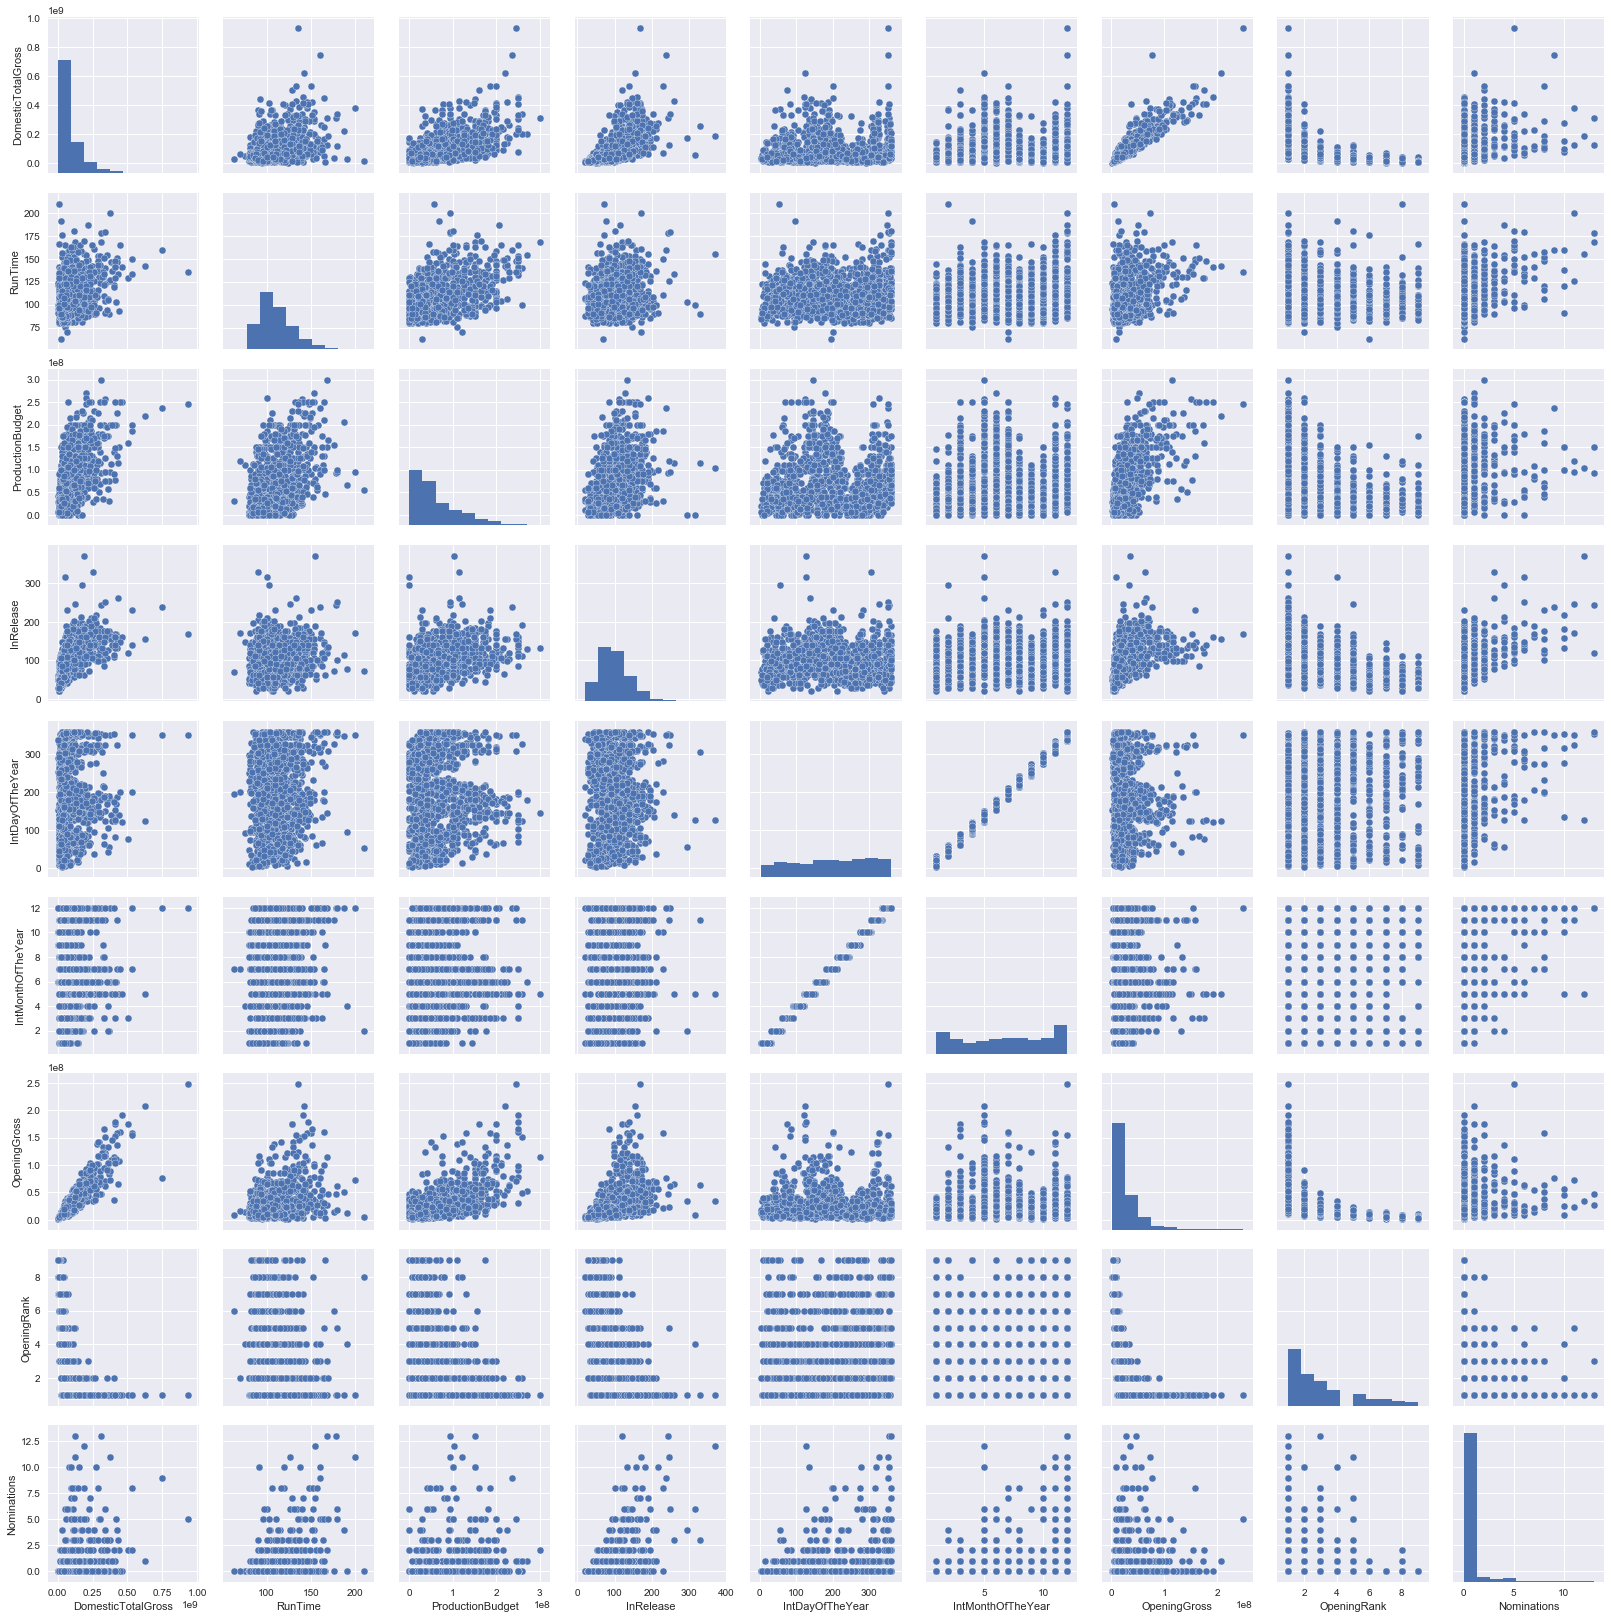

In [75]:
sns.pairplot(df[['DomesticTotalGross','RunTime','ProductionBudget','InRelease','IntDayOfTheYear','IntMonthOfTheYear','OpeningGross','OpeningRank','Nominations']])

In [77]:
model = sm.OLS(y_train.astype(float),X_train.astype(float))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Nominations   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     67.40
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           1.39e-89
Time:                        18:53:21   Log-Likelihood:                -1824.5
No. Observations:                1080   AIC:                             3665.
Df Residuals:                    1072   BIC:                             3705.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
DomesticTotalGross  1.699e-08   1.29e-09     13.180      0.000    1.45e-08    1.95e-08
RunTime                0.0032      0.002      2.079      0.038       0.000       0.006
ProductionBudget    1.955e-09   9.99e-10      1.957      0.051   -5.58e-12    3.92e-09
InRelease              0.0015      0.001      1.225      0.221      -0.001       0.004
IntDayOfTheYear        0.0114      0.005      2.486      0.013       0.002       0.020
IntMonthOfTheYear     -0.3302      0.138     -2.387      0.017      -0.602      -0.059
OpeningGross       -4.835e-08   3.99e-09    -12.126      0.000   -5.62e-08   -4.05e-08
OpeningRank           -0.0695      0.022     -3.219      0.001      -0.112      -0.027
==============================================================================
Omnibus:                      951.471   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28103.803
Skew:                           4.036   Prob(JB):                         0.00
Kurtosis:                      26.651   Cond. No.                     5.26e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### the bad
* highly likely multi colinearity (wins and noms, opening gross & total domestic gross, dayinyear & monthinyear)
* r*2 of .335 - linear regression not the best for this combo of features/target
* r*2 upped to .337 after adding opening weekend ratio

#### the sorta good
* low P>|t| is good - means the null hypothesis not likely either. EXCEPT for Production Budget

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


([], <a list of 0 Text yticklabel objects>)

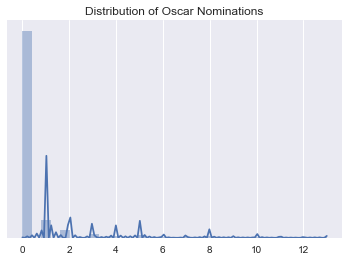

In [16]:
sns.distplot(y_train)
plt.title("Distribution of Oscar Nominations")
#plt.xlabel("Nominations")
plt.yticks([])

* highly skewed distribution to the right - probs gonna need to log

In [61]:
### rando first model

In [11]:
# split x_train into 5 folds for cross val

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [12]:
lm1=LinearRegression()

scores = cross_val_score(lm1, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

lm1.fit(X_train, y_train)

[0.358541   0.30976676 0.28506356 0.34931663 0.39070618]
Linear Reg Mean Score:  0.3386788256380691


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

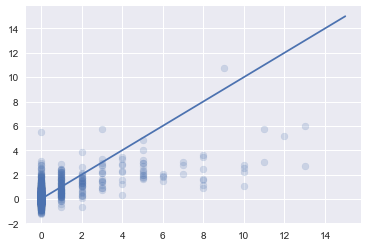

In [71]:
# Fitted vs. Actual
y_train_pred = lm1.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 15], [0, 15])

### ridge cross val

### Lasso cross val